<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Deep_Learning/blob/main/2348505_Ex8(DL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 9.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
import cv2
import math
import yaml
import os
from keras.preprocessing.image import ImageDataGenerator
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [ ]:
def resize_frames(input_folder, output_folder, target_size):
    for frame_file in os.listdir(input_folder):
        frame_path = os.path.join(input_folder, frame_file)
        frame = cv2.imread(frame_path)
        if frame is None:
            print("Error: Unable to read the frame. Check if the frame is empty.")
            continue
        resized_frame = cv2.resize(frame, target_size)
        output_path = os.path.join(output_folder, frame_file)
        cv2.imwrite(output_path, resized_frame)
input_frames_folder = r'F:/Lab8 Dataset/images'
output_resized_frames_folder = r'F:/Lab8 Dataset/images_resized'
target_size = (640, 640)
resize_frames(input_frames_folder, output_resized_frames_folder, target_size)

In [ ]:
def normalize_resized_frames(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    frame_files = [f for f in os.listdir(input_folder) if f.endswith('.jpg')]
    for frame_file in frame_files:
        frame_path = os.path.join(input_folder, frame_file)
        frame = cv2.imread(frame_path)
        #Normalize pixel values to the range [0, 1]
        normalized_frame = frame / 255.0
        output_path = os.path.join(output_folder, frame_file)
        cv2.imwrite(output_path, normalized_frame * 255.0)
resized_frames_folder_path = r'C:F:/Lab8 Dataset/images_resized'
normalized_frames_folder_path = r'F:/Lab8 Dataset/images_normalized'
normalize_resized_frames(resized_frames_folder_path, normalized_frames_folder_path)

In [ ]:
def augment_frames(input_folder, output_folder, augmentations_per_image=3):
    os.makedirs(output_folder, exist_ok=True)
    frame_files = [f for f in os.listdir(input_folder) if f.endswith('.jpg')]
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')
    for frame_file in frame_files:
        frame_path = os.path.join(input_folder, frame_file)
        frame = cv2.imread(frame_path)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = frame.reshape((1,) + frame.shape)
        for i, batch in enumerate(datagen.flow(frame, batch_size=1, save_to_dir=output_folder, save_prefix=f"{frame_file[:-4]}_aug", save_format='jpg')):
            if i >= augmentations_per_image:
                break
resized_normalized_frames_folder_path = r'F:/Lab8 Dataset/images_normalized'
augmented_frames_folder_path = r'F:/Lab8 Dataset/images_augmented_less'
augment_frames(resized_normalized_frames_folder_path, augmented_frames_folder_path)


0: 640x640 1 person, 1 motorcycle, 416.1ms
Speed: 15.6ms preprocess, 416.1ms inference, 15.6ms postprocess per image at shape (1, 3, 640, 640)
Confidence ---> 0.79
Class name --> bus
Confidence ---> 0.65
Class name --> Unknown


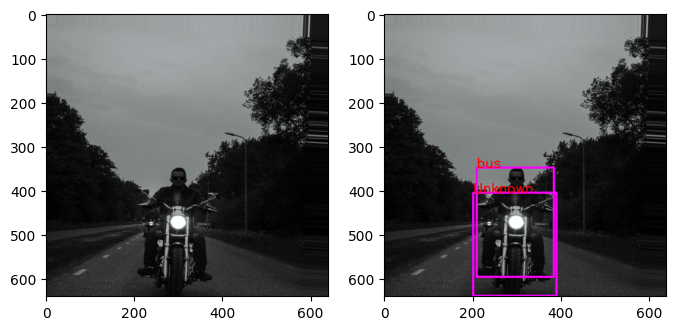

In [ ]:
with open("vehicles.yaml", "r") as file:
    config = yaml.safe_load(file)
img = cv2.imread(r'F:/Lab8 Dataset/test/pexels-bas-masseus-1253639_aug_0_8917.jpg')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,8))
ax[0].imshow(img)
model = YOLO("yolov8n.pt")
classNames = config['names']
results = model(img)
# Coordinates
for r in results:
    boxes = r.boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 3)
        confidence = math.ceil((box.conf[0] * 100)) / 100
        print("Confidence --->", confidence)
        cls = int(box.cls[0])
        class_name = classNames[cls] if 0 <= cls < len(classNames) else "Unknown"
        print("Class name -->", class_name)
        org = [x1, y1]
        font = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 1
        color = (255, 0, 0)
        thickness = 2
        cv2.putText(img, class_name, org, font, fontScale, color, thickness)
ax[1].imshow(img)


0: 640x640 (no detections), 554.9ms
Speed: 15.6ms preprocess, 554.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


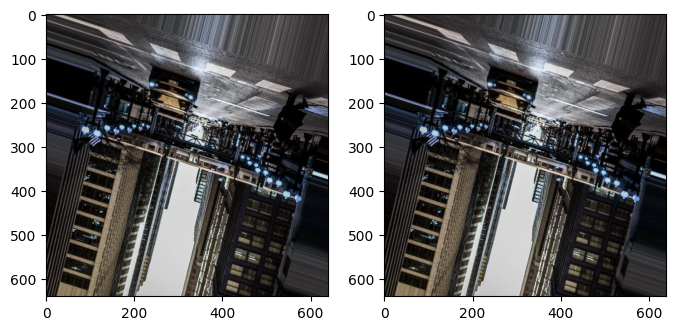

In [ ]:
with open("vehicles.yaml", "r") as file:
    config = yaml.safe_load(file)

img = cv2.imread(r'F:/Lab8 Dataset/pexels-cameron-casey-1152866_aug_0_227.jpg')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,8))
ax[0].imshow(img)
model = YOLO("yolov8n.pt")
classNames = config['names']
results = model(img)
# Coordinates
for r in results:
    boxes = r.boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)  # Convert to int values
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 3)
        confidence = math.ceil((box.conf[0] * 100)) / 100
        print("Confidence --->", confidence)
        cls = int(box.cls[0])
        class_name = classNames[cls] if 0 <= cls < len(classNames) else "Unknown"
        print("Class name -->", class_name)
        org = [x1, y1]
        font = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 1
        color = (255, 0, 0)
        thickness = 2
        cv2.putText(img, class_name, org, font, fontScale, color, thickness)
ax[1].imshow(img)

In [ ]:
import cv2
from ultralytics import YOLO
img = cv2.imread('/content/pexels-pixabay-221258_aug_0_4655.jpg')
model = YOLO("yolov8n.pt")
results = model(img)

100%|██████████| 6.23M/6.23M [00:00<00:00, 177MB/s]



0: 640x640 1 clock, 391.4ms
Speed: 12.6ms preprocess, 391.4ms inference, 2438.3ms postprocess per image at shape (1, 3, 640, 640)


Mean Average Precision (mAP): Higher values of mAP indicate better performance. It means the model is better at making precise predictions while also recalling a significant portion of the ground truth objects.

Mean Intersection over Union (mIoU): Higher mIoU values generally indicate better object localization. A higher value means the predicted bounding boxes overlap more with the ground truth bounding boxes.

Mean Generalized Intersection over Union (mGIoU):
Similar to mIoU, higher mGIoU values indicate better localization accuracy, considering both overlap and bounding box shape.

In [ ]:
import numpy as np
ground_truth_boxes = np.array([
    [0.500000, 0.688053, 0.300885, 0.247788, 0],
    [0.359513, 0.684735, 0.272124, 0.121681, 1],
    [0.455752, 0.265487, 0.314159, 0.517699, 2],
])
predicted_boxes = np.array([
    [0.629425, 0.405973, 0.245575, 0.170354, 0.9, 0],
    [0.544248, 0.474558, 0.411504, 0.546460, 0.8, 1],
    [0.463496, 0.769912, 0.307522, 0.451327, 0.7, 2],
])
def calculate_iou(gt, pred):
    x1_int = max(gt[0], pred[0])
    y1_int = max(gt[1], pred[1])
    x2_int = min(gt[2], pred[2])
    y2_int = min(gt[3], pred[3])
    intersection_area = max(0, x2_int - x1_int + 1) * max(0, y2_int - y1_int + 1)
    gt_area = (gt[2] - gt[0] + 1) * (gt[3] - gt[1] + 1)
    pred_area = (pred[2] - pred[0] + 1) * (pred[3] - pred[1] + 1)
    union_area = gt_area + pred_area - intersection_area
    iou = intersection_area / union_area
    return iou
total_iou = 0
total_giou = 0
total_ap = 0
for gt_box in ground_truth_boxes:
    ious = []
    for pred_box in predicted_boxes:
        if gt_box[4] != pred_box[5]:
            iou = 0
        else:
            iou = calculate_iou(gt_box[:4], pred_box[:4])
            x1_int = max(gt_box[0], pred_box[0])
            y1_int = max(gt_box[1], pred_box[1])
            x2_int = min(gt_box[2], pred_box[2])
            y2_int = min(gt_box[3], pred_box[3])
            intersection_area = max(0, x2_int - x1_int + 1) * max(0, y2_int - y1_int + 1)
            gt_area = (gt_box[2] - gt_box[0] + 1) * (gt_box[3] - gt_box[1] + 1)
            pred_area = (pred_box[2] - pred_box[0] + 1) * (pred_box[3] - pred_box[1] + 1)
            union_area = gt_area + pred_area - intersection_area
        ious.append(iou)
    max_iou = max(ious) if ious else 0
    total_iou += max_iou
    if max_iou > 0:
        pred_box = predicted_boxes[np.argmax(ious)]
        giou = calculate_iou(gt_box[:4], pred_box[:4])
        x1_enclose = min(gt_box[0], pred_box[0])
        y1_enclose = min(gt_box[1], pred_box[1])
        x2_enclose = max(gt_box[2], pred_box[2])
        y2_enclose = max(gt_box[3], pred_box[3])
        enclose_area = max(1e-16, (x2_enclose - x1_enclose + 1) * (y2_enclose - y1_enclose + 1))
        giou = giou - ((enclose_area - union_area) / enclose_area)
        total_giou += giou
    ap = total_iou / len(ground_truth_boxes)
    total_ap += ap
mAP = total_ap / len(ground_truth_boxes)
mIoU = total_iou / len(ground_truth_boxes)
mGIoU = total_giou / len(ground_truth_boxes)

print("Mean Average Precision (mAP):", mAP)
print("Mean Intersection over Union (mIoU):", mIoU)
print("Mean Generalized Intersection over Union (mGIoU):", mGIoU)

Mean Average Precision (mAP): 0.28863628920790274
Mean Intersection over Union (mIoU): 0.44251350059998695
Mean Generalized Intersection over Union (mGIoU): 0.38207545297129436


Mean Average Precision (mAP): Average Precision (AP) is a popular metric in object detection. It measures the average of precision values at different recall levels. Precision is the ratio of true positive predictions to the total number of predicted positives.
In this script, we are calculating AP for each ground truth box, then taking the average across all ground truth boxes to get mAP.

Mean Intersection over Union (mIoU): Intersection over Union (IoU) measures the overlap between the predicted bounding box and the ground truth box. It's calculated as the area of overlap between the two boxes divided by the area of union.
mIoU is the average of IoU values calculated for each pair of predicted and ground truth boxes.

Mean Generalized Intersection over Union (mGIoU): Generalized IoU (GIoU) is an improvement over IoU that also considers the bounding box shapes when computing the overlap.
mGIoU is the average of GIoU values calculated for each pair of predicted and ground truth boxes.

In [ ]:
def non_max_suppression(boxes, scores, iou_threshold):
    sorted_indices = np.argsort(scores)[::-1]
    keep_indices = []
    while len(sorted_indices) > 0:
        max_index = sorted_indices[0]
        keep_indices.append(max_index)
        ious = np.array([calculate_iou(boxes[max_index], boxes[idx]) for idx in sorted_indices[1:]])
        indices_to_keep = np.where(ious <= iou_threshold)[0]
        sorted_indices = sorted_indices[indices_to_keep + 1]
    return keep_indices

In [ ]:
def visualize_detections(image, boxes, class_ids, class_names):
    for box, class_id in zip(boxes, class_ids):
        x1, y1, x2, y2, confidence, _ = box
        class_name = class_names[class_id]
        color = (0, 255, 0)
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
        label = f"{class_name}: {confidence:.2f}"
        cv2.putText(image, label, (int(x1), int(y1 - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return image

Non-Maximum Suppression (NMS) is a technique commonly used in object detection to reduce redundant and overlapping bounding boxes predicted by an algorithm. The main goal of NMS is to clean up the bounding box outputs so that for each object in the image, we ideally have just one bounding box that best encapsulates that object.

Purpose of Non-Maximum Suppression:
Removing Redundancy: When an object is detected, the object detection model might predict multiple bounding boxes that cover the same object or region.

Selecting the Best Box: NMS helps in selecting the most confident and accurate bounding box for each object by suppressing (removing) the redundant and less confident boxes.

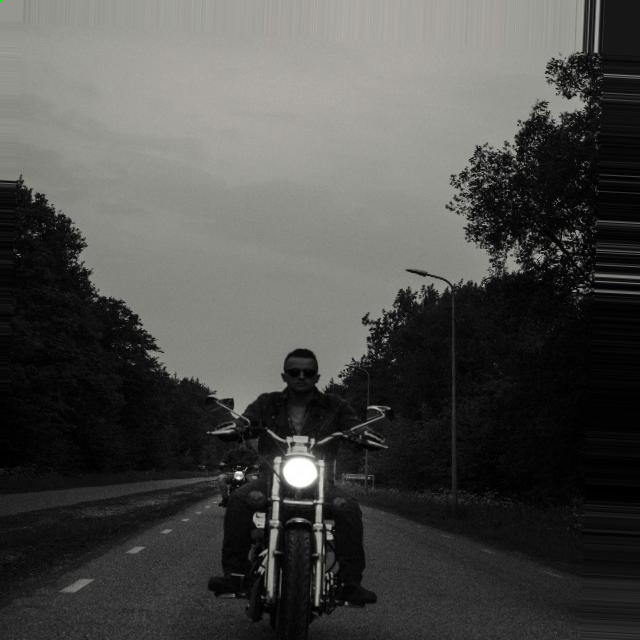

In [ ]:
from google.colab.patches import cv2_imshow

nms_indices = non_max_suppression(predicted_boxes[:, :4], predicted_boxes[:, 4], iou_threshold=0.5)
filtered_boxes = predicted_boxes[nms_indices]

image = cv2.imread("/content/pexels-bas-masseus-1253639_aug_0_8917.jpg")  # Load your test image here
class_names = ["Class 0", "Class 1", "Class 2"]
output_image = visualize_detections(image, filtered_boxes[:, :6], filtered_boxes[:, 5].astype(int), class_names)
cv2_imshow(output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()